<a href="https://colab.research.google.com/github/lizathulya/Data_Analytics_/blob/main/Predictive_Analysis_of_Meterolgical_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np  # For linear algebra operations (e.g., working with arrays)
import pandas as pd  # For data manipulation and processing, including handling CSV files
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For implementing the Random Forest regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For attractive and informative statistical graphics


In [4]:
# Reading a CSV file into a pandas DataFrame
# - `pd.read_csv`: Reads a CSV file and converts it into a pandas DataFrame for data analysis and manipulation.
# - `r"/content/Clean_Data.csv"`: Specifies the file path to the CSV file.
#    The `r` before the string denotes a raw string to handle special characters (e.g., backslashes) in the file path.
df = pd.read_csv(r"/content/Clean_Data.csv")


In [5]:
# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

# print out sample dataset
# - `df.head()`: Shows the first 5 rows of the DataFrame by default.
#   This is useful for quickly inspecting the structure, column names, and sample data.
print(len(df))
df.head()

35879


,Country,Location_Name,Latitude,Longitude,Timezone,Last_Updated_Epoch,Last_Updated,Temperature_Celsius,Temperature_Fahrenheit,Wind_MPH,...,Air_Quality_PM2.5,Air_Quality_PM10,Air_Quality_US-Epa-Index,Air_Quality_Gb-Defra-Index,Sunrise,Sunset,Moonrise,Moonset,Moon_Phase,Moon_Illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715849e+09,5/16/2024 13:15,26.6,79.8,8.3,...,8.4,26.6,1.0,1.0,1/0/1900 4:50,1/0/1900 18:50,1/0/1900 12:12,1:11 AM,Waxing Gibbous,55.0
1,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715868e+09,5/16/2024 18:30,22.0,71.6,4.5,...,9.4,18.9,1.0,1.0,1/0/1900 4:50,1/0/1900 18:50,1/0/1900 12:12,1:11 AM,Waxing Gibbous,55.0
2,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715962e+09,5/17/2024 20:30,15.0,58.9,3.4,...,8.3,18.1,1.0,1.0,1/0/1900 4:49,1/0/1900 18:51,1/0/1900 13:09,1:37 AM,Waxing Gibbous,64.0
3,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.716043e+09,5/18/2024 19:00,19.5,67.1,2.2,...,7.5,15.3,1.0,1.0,1/0/1900 4:48,1/0/1900 18:51,1/0/1900 14:04,2:00 AM,Waxing Gibbous,73.0
4,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.716127e+09,5/19/2024 18:30,16.9,62.4,4.0,...,4.8,10.1,1.0,1.0,1/0/1900 4:48,1/0/1900 18:52,1/0/1900 15:00,2:22 AM,Waxing Gibbous,81.0


In [6]:
# Count unique rows without showing their frequencies
unique_rows_count = len(df.drop_duplicates())

# Display the count of unique rows
print(unique_rows_count)

35879


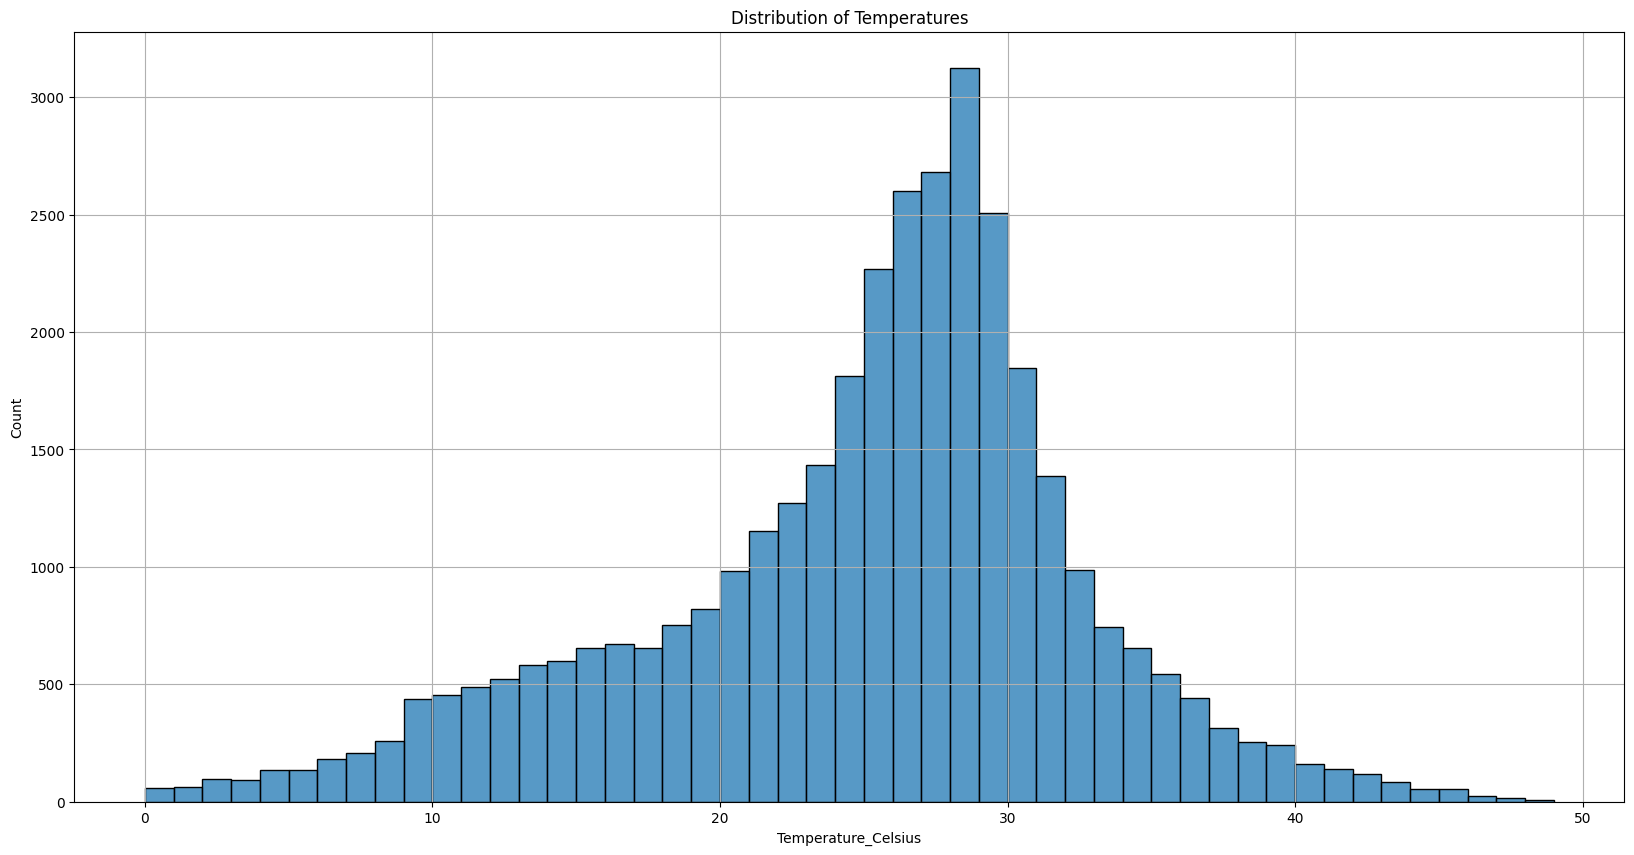

In [7]:
# Create a figure for plotting with specified size
plt.figure(figsize=(20, 10))
# Plot a histogram of the '_tempm' column with specified bins
sns.histplot(df['Temperature_Celsius'], bins=[i for i in range(0, 50, 1)], kde=False)
# Add a title to the plot
plt.title("Distribution of Temperatures")
# Enable grid on the plot for better readability
plt.grid()
# Display the plot
plt.show()

In [9]:
# Select features for prediction
features = ['Latitude', 'Longitude', 'Wind_MPH', 'Pressure_MB', 'Humidity',
           'Cloud', 'Visibility_KM', 'UV_Index', 'Air_Quality_PM2.5']
X = df[features]
y = df['Temperature_Celsius']

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [11]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [15]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Random Forest Model Performance:')
print('Root Mean Square Error:', round(rmse, 2))
print('R-squared Score:', round(r2, 2))

Random Forest Model Performance:
Root Mean Square Error: 2.1
R-squared Score: 0.93


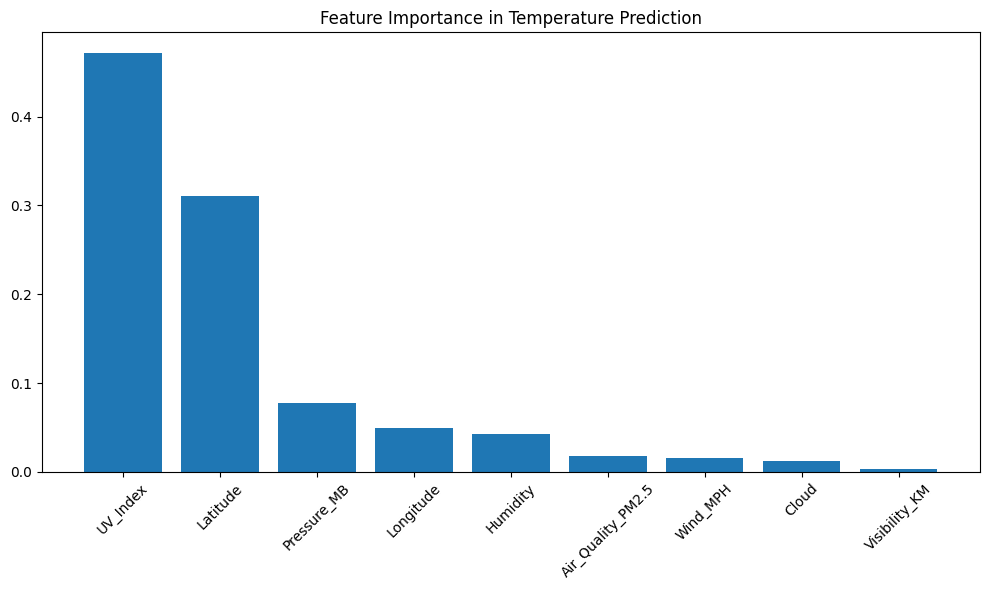

In [16]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Temperature Prediction')
plt.tight_layout()
plt.show()